# Flow Constrictions on Upper Rainy River

In [11]:
# Display graphics inline with the notebook
%matplotlib notebook

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# Modules to display images and data tables
from IPython.display import Image
from IPython.core.display import display

dir = '../data/'
img = '../images/'

hydat = pd.HDFStore('../data/hydat.h5')
DLY_LEVELS = hydat['DLY_LEVELS']
DLY_FLOWS = hydat['DLY_FLOWS']
STATIONS = hydat['STATIONS']

def getFlowsWSC(s):
    data = DLY_FLOWS[DLY_FLOWS['STATION_NUMBER'] == s]
    ts = {}
    for k in data.index:
        mo = str(data.ix[k,'MONTH'])
        yr = str(data.ix[k,'YEAR'])
        for n in range(1,data.ix[k,'NO_DAYS']+1):
            ts[pd.to_datetime(mo+'/'+str(n)+'/'+yr)] = data.ix[k,'FLOW'+str(n)]  
    ts = pd.Series(ts)
    ts.name = STATIONS.ix[s,'STATION_NAME'] + ' (' + s + ')'
    # drop initial and terminal null entries
    j = 0
    while pd.isnull(ts.ix[j]):
        j += 1
    k = len(ts.index) - 1
    while pd.isnull(ts.ix[k]):
        k += -1 
    return ts[j:k]

def getLevelsWSC(s):
    global DLY_LEVELS
    data = DLY_LEVELS[DLY_LEVELS['STATION_NUMBER'] == s]
    ts = {}
    for k in data.index:
        mo = str(data.ix[k,'MONTH'])
        yr = str(data.ix[k,'YEAR'])
        for n in range(1,data.ix[k,'NO_DAYS']+1):
            ts[pd.to_datetime(mo+'/'+str(n)+'/'+yr)] = data.ix[k,'LEVEL'+str(n)]  
    ts = pd.Series(ts)
    ts.name = STATIONS.ix[s,'STATION_NAME'] + ' (' + s + ')'
    # drop initial and terminal null entries
    j = 0
    while pd.isnull(ts.ix[j]):
        j += 1
    k = len(ts.index) - 1
    while pd.isnull(ts.ix[k]):
        k += -1
    return ts[j:k]

def mapWSC(stationList):
    S = STATIONS.ix[stationList,['STATION_NAME','LATITUDE','LONGITUDE']]
    locs = ["{0},{1}".format(S.ix[s,'LATITUDE'], S.ix[s,'LONGITUDE']) \
             for s in S.index]
    google_maps_url = \
        "https://maps.googleapis.com/maps/api/staticmap?" + \
        "size=640x320" + \
        "&maptype=terrain" + \
        "&markers=color:red%7Csize:mid%7C" + "|".join(locs)
    img = Image(url = google_maps_url)    
    display(img)
    return S

In [12]:
from IPython.display import Image
from IPython.core.display import display

ranierLevelStations = ['05PB007','05PC024','05PC025']
ranierFlowStations = ['05PC019']

levelLocs = ["{0},{1}".format(STATIONS.ix[s,'LATITUDE'], \
    STATIONS.ix[s,'LONGITUDE']) for s in ranierLevelStations]
levelMarkers = "&markers=color:red%7Csize:mid%7C" + "|".join(levelLocs)

flowLocs = ["{0},{1}".format(STATIONS.ix[s,'LATITUDE'], \
    STATIONS.ix[s,'LONGITUDE']) for s in ranierFlowStations]
flowMarkers = "&markers=color:green%7Csize:mid%7C" + "|".join(flowLocs)

google_maps_url = "https://maps.googleapis.com/maps/api/staticmap?" + \
    "size=640x300&maptype=terrain"
    
Image(url = google_maps_url + levelMarkers + flowMarkers)
Image.save9

<IPython.core.display.Javascript object>


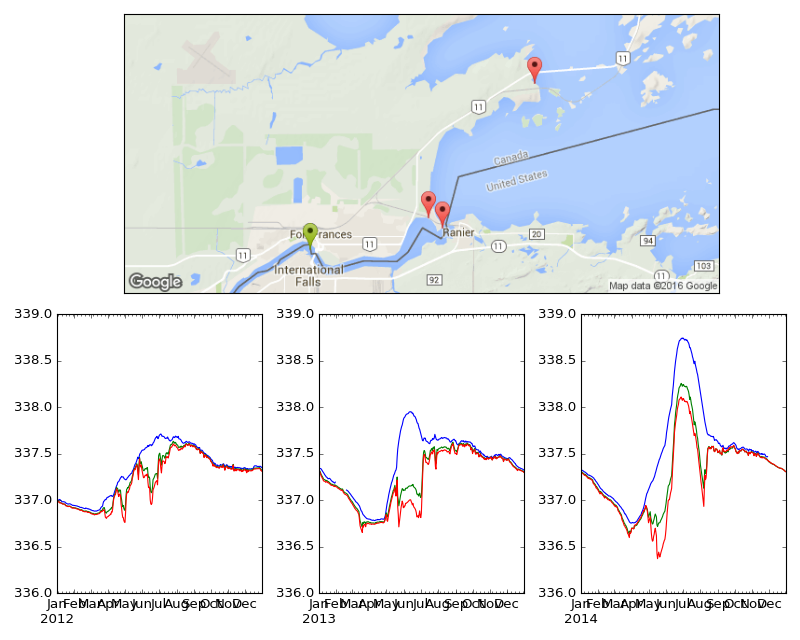

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import urllib
urllib.urlretrieve(google_maps_url + levelMarkers + flowMarkers,'../images/RRMap.png')

img=mpimg.imread('../images/RRMap.png')

plt.figure(figsize=(10,8))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 3, height_ratios=[1,1])
ax1 = plt.subplot(gs[0,:])

fig = ax1.imshow(img)
fig.set_cmap('hot')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

def ranier(y,ax):
    plt.hold(True)
    for r in ranierLevelStations:
        lvl = getLevelsWSC(r)
        lvl[lvl.index.year==y].plot()
    #ax.legend(ranierLevelStations,loc='upper left')
    plt.ylim(336.0,339.0)
    plt.hold(False)

ranier(2012,plt.subplot(gs[1,0]))
ranier(2013,plt.subplot(gs[1,1]))
ranier(2014,plt.subplot(gs[1,2]))

plt.tight_layout()

fname = '../images/RainyRiverConstrictions.png'

plt.savefig(fname)
!convert $fname -trim $fname